# Creating a multilingual dataset from Reddit
In this notebook we will be building a multilingual dataset divided in categories from Reddit.

The chosen categories are:
 - Politics
 - Science
 - Sport
 - Videogame

The chosen languages are:
 - English
 - German
 - Italian
 - Spanish
 - Portuguese

Finally, we download some more control data in French, to test the performances of the models on an unknown language

## Import

In [ ]:
import requests
import pandas as pd
import time

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()

drive_service = build('drive', 'v3', cache_discovery=False)

def save_file_to_drive(name, path):
  file_metadata = {
    'name': name,
    'mimeType': 'application/octet-stream'
  }

  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)

  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()

  print('File ID: {}'.format(created.get('id')))

  return created

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
def upload_from_drive(link, name):
  id = link.split('file/d/')[1].split('/view?usp=sharing')[0]
  downloaded = drive.CreateFile({'id': id}) 
  downloaded.GetContentFile(name) 

## Reddit scraping

In [ ]:
url = "https://api.pushshift.io/reddit/search/submission"

def crawl_page(subreddit: str, sort_by: str, last_page = None):
  
  params = {"subreddit": subreddit, "size": 500, "sort": "desc", "sort_type": sort_by}
  if last_page is not None:
    if len(last_page) > 0:
      # resume from where we left at the last page
      params["before"] = last_page[-1][sort_by]
    else:
      # the last page was empty, we are past the last page
      return []
  results = requests.get(url, params)
  if not results.ok:
    # something wrong happened
    raise Exception("Server returned status code {}".format(results.status_code))
  return results.json()["data"]

def crawl_subreddit(subreddit, sort_by, max_submissions = 10000):
  
  submissions = []
  last_page = None
  while last_page != [] and len(submissions) < max_submissions:
    try:
      last_page = crawl_page(subreddit, sort_by, last_page)
    except:
      break
    submissions += last_page
    print(str(len(submissions)) + str(" posts obtained out of ") + str(max_submissions))
    time.sleep(2)
  return submissions[:max_submissions]


## Chosen subreddits

The chosen subreddits are:
 - For English
    - Politics: r/politics
    - Science & Technology: r/science 
    - Sport: r/sports
    - Videogame: r/Games
 - For Italian
    - Politics: r/politicaITA + (r/leganord, r/M5S, r/osservatoriorenzi, r/partitoDemocratico, r/POL_IT)
    - Science: r/scienzaItalia + (r/AndroidItalia, r/ItalyInformatica, r/programmazione)
    - Sport: r/ItalyCalcio è r/Italy-flair "Sport"
    - Games & Videogames: r/craftitaly, r/gdr, r/ItalianGaming
 - For German
    - Politics: r/de flair:politik
    - Science: r/Wissenschaft + (r/Physik, r/de_IT, r/de_android, r/informatik)
    - Sport: r/bundesliga + (r/FCBayern, r/BorussiaDortmund)
    - Videogame: zocken
 - For Spanish
    - Politics: r/podemos, r/libertario, r/Mexico_news-flair "politica"(vari) + (r/MundoEnEspanol,r/noticias_en_espanol,r/noticiasdelmundo)
    - Science: r/ciencia + (r/techES, r/androidES, r/MundoGeek)
    - Sport: r/futbol + (r/fulbo, r/futbolmx)
    - Videogame: r/Argaming + (r/gamingESP, r/videojuegos, r/videojuego)
 - For Portuguese
    - Politics: r/politicaBrasileira + (r/brasil-flair:"noticia" o "politica", r/portugal-flair:)
    - Science: r/cienciabrasil
    - Sport: r/futebol
    - Videogame: r/gamesEcultura + (r/rpg_brasil)


In [ ]:
subreddit_list = ['politics', 'science', 'sports', 'Games',
                  'politicaITA', 'scienzaItalia', 'ItalyCalcio','ItalianGaming',
                  'de', 'Wissenschaft', 'bundesliga', 'zocken',
                  'Mexico_news', 'ciencia', 'futbol', 'Argaming',
                  'politicaBrasileira', 'futebol', 'gamesEcultura', 'cienciabrasil',
                  'de_IT', 'informatik', 'de_android',
                  'techES', 'fulbo', 'futbolmx', 'gamingESP',
                  'corinthians','coronabr']

In [ ]:
df = pd.DataFrame()
for subreddit in subreddit_list:
  print("\nDownloading subreddit ", subreddit)
  print("\n")
  latest_submissions = []
  latest_submissions = crawl_subreddit(subreddit, 'created_utc')
  df = pd.concat([df, pd.DataFrame(latest_submissions)])
df.to_csv('multilingual_reddit.csv', index=False)
save_file_to_drive('multilingual_reddit.csv', 'multilingual_reddit.csv')




100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtained out of 10000
600 posts obtained out of 10000
700 posts obtained out of 10000
800 posts obtained out of 10000
900 posts obtained out of 10000
1000 posts obtained out of 10000
1100 posts obtained out of 10000
1200 posts obtained out of 10000
1300 posts obtained out of 10000
1400 posts obtained out of 10000
1500 posts obtained out of 10000
1600 posts obtained out of 10000
1700 posts obtained out of 10000
1800 posts obtained out of 10000
1900 posts obtained out of 10000
2000 posts obtained out of 10000
2100 posts obtained out of 10000
2200 posts obtained out of 10000
2300 posts obtained out of 10000
2400 posts obtained out of 10000
2500 posts obtained out of 10000
2600 posts obtained out of 10000



100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtaine

{'id': '125e8wxg056ekpsdRnrVqSbSPWasoiqSc'}

## Adding more rows and adjusting categories

In [ ]:
#upload_from_drive('https://drive.google.com/file/d/1ySksz7xV1H7-l4gAMNOS7R0nAVJJHGI9/view?usp=sharing', 'multilingual_reddit.csv')
df = pd.read_csv('multilingual_reddit.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,11,12,18,19,20,21,22,24,26,31,32,33,37,39,47,48,49,59,62,63,71,75,77,78,79,81,82,84,89,90,91,96,100,101,102,104) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
columns_to_keep = ['domain', 'link_flair_text', 'selftext', 'subreddit', 'url', 'title']
df = df.drop(df.columns.difference(columns_to_keep), axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60244 entries, 0 to 60243
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   domain           60241 non-null  object
 1   link_flair_text  30712 non-null  object
 2   selftext         11075 non-null  object
 3   subreddit        60244 non-null  object
 4   title            60244 non-null  object
 5   url              60244 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


In [ ]:
df['subreddit'].unique()

array(['politics', 'science', 'sports', 'Games', 'politicaITA',
       'ScienzaItalia', 'ItalyCalcio', 'ItalianGaming', 'de',
       'Wissenschaft', 'Bundesliga', 'Mexico_News', 'ciencia', 'futbol',
       'Argaming', 'PoliticaBrasileira', 'futebol', 'gamesEcultura',
       'zocken', 'cienciabrasil', 'GDR', 'Physik', 'techES', 'fulbo',
       'futbolmx', 'gamingesp', 'Corinthians', 'coronabr'], dtype=object)

In [ ]:
subreddit_info = {
    'politics':           {'lang': 'en', 'category': 'politics'},
    'science':            {'lang': 'en', 'category': 'science'},
    'sports':             {'lang': 'en', 'category': 'sports'},
    'Games':              {'lang': 'en', 'category': 'games'},
    'politicaITA':        {'lang': 'it', 'category': 'politics'},
    'ScienzaItalia':      {'lang': 'it', 'category': 'science'},
    'ItalyCalcio':        {'lang': 'it', 'category': 'sports'},
    'ItalianGaming':      {'lang': 'it', 'category': 'games'},
    'de':                 {'lang': 'de', 'category': 'various'},
    'Wissenschaft':       {'lang': 'de', 'category': 'science'},
    'Bundesliga':         {'lang': 'de', 'category': 'sports'},
    'Mexico_News':        {'lang': 'sp', 'category': 'politics'},
    'ciencia':            {'lang': 'sp', 'category': 'science'},
    'futbol':             {'lang': 'sp', 'category': 'sports'},
    'Argaming':           {'lang': 'sp', 'category': 'games'},
    'PoliticaBrasileira': {'lang': 'pt', 'category': 'politics'}, 
    'futebol':            {'lang': 'pt', 'category': 'sports'},
    'gamesEcultura':      {'lang': 'pt', 'category': 'games'},
    'zocken':             {'lang': 'de', 'category': 'games'},
    'cienciabrasil':      {'lang': 'pt', 'category': 'science'},
    'GDR':                {'lang': 'it', 'category': 'games'},
    'Physik':             {'lang': 'de', 'category': 'science'},
    'techES':             {'lang': 'sp', 'category': 'science'},
    'fulbo':              {'lang': 'sp', 'category': 'sports'},
    'futbolmx':           {'lang': 'sp', 'category': 'sports'},
    'gamingesp':          {'lang': 'sp', 'category': 'games'},       
    'Corinthians':        {'lang': 'pt', 'category': 'sports'},
    'coronabr':           {'lang': 'pt', 'category': 'science'},
    'brasil':             {'lang': 'pt', 'category': 'various'},
    'portugal':           {'lang': 'pt', 'category': 'various'},
    'soccer':             {'lang': 'en', 'category': 'sports'}
}

To adjust:
 - drop coronabr, techES
 - flair mexico_news
 - substitute r/sports with r/soccer
 - science portuguese -> r/brasil (flair: ciencia & tecnologia), r/portugal (flair: ciencia)

In [ ]:
df['language'] = df['subreddit'].apply(lambda row: subreddit_info[row]['lang'])
df['category'] = df['subreddit'].apply(lambda row: subreddit_info[row]['category'])

We need to clean subreddits 'de' and 'Mexico_News'

In [ ]:
de_flairs = {
 'Interessant':              'None',
 'Bildung':                  'None',
 'Frage/Diskussion':         'None',
 'Corona':                   'None',
 'Musik':                    'None',
 'Wissenschaft&amp;Technik': 'science',
 'Wirtschaft':               'politics',
 'Humor':                    'None',
 'Hilfe':                    'None',
 'Fotos':                    'None',
 'Nachrichten DE':           'None',
 'Feuilleton/Kultur':        'None',
 'Politik':                  'politics',
 'Nachrichten Europa':       'None',
 'Gesellschaft':             'politics',
 'Geschichte':               'None',
 'TIRADE':                   'None',
 'Nachrichten Welt':         'None',
 'Medien':                   'None',
 'Sport':                    'sports',
 'Umwelt':                   'science',
 'Essen&amp;Trinken':        'None',
 'Zocken':                   'games',
 'US-Wahl':                  'politics',
 'Internet':                 'None',
 'Kriminalität':             'politics',
 'Social Media':             'None',
 'Kolumne':                  'None',
 'Terrorismus':              'politics',
 'Paywall':                  'None',
 'Nachrichten A':            'None',
 'US-Politik':               'politics',
 'Boulevard':                'None',
 'Dienstmeldung':            'None',
 'Meta/Reddit':              'None',
 'Nachrichten CH':           'None',
 'NSFL':                     'None'
}

def assign_category_de(row):
  if row['subreddit'] != 'de':
    return row['category']
  
  if row['link_flair_text'] in de_flairs:
    return de_flairs[row['link_flair_text']]
  else:
    return 'None'

df['category'] = df.apply(assign_category_de, axis=1)


In [ ]:
len(df[(df['language'] == 'de') & (df['category'] == 'politics')])

3041

We need to modify science portuguese

In [ ]:
df = df[df['subreddit'] != 'coronabr']
df = df[df['subreddit'] != 'brasil']
df = df[df['subreddit'] != 'portugal']

In [ ]:
latest_submissions = pd.DataFrame(crawl_subreddit('brasil', 'created_utc', max_submissions=30000))
latest_submissions = latest_submissions.drop(latest_submissions.columns.difference(columns_to_keep), axis=1)
latest_submissions['language'] = 'pt'
latest_submissions['category'] = 'various'
df = pd.concat([df, latest_submissions])

100 posts obtained out of 30000
200 posts obtained out of 30000
300 posts obtained out of 30000
400 posts obtained out of 30000
500 posts obtained out of 30000
600 posts obtained out of 30000
700 posts obtained out of 30000
800 posts obtained out of 30000
900 posts obtained out of 30000
1000 posts obtained out of 30000
1100 posts obtained out of 30000
1200 posts obtained out of 30000
1300 posts obtained out of 30000
1400 posts obtained out of 30000
1500 posts obtained out of 30000
1600 posts obtained out of 30000
1700 posts obtained out of 30000
1800 posts obtained out of 30000
1900 posts obtained out of 30000
2000 posts obtained out of 30000
2100 posts obtained out of 30000
2200 posts obtained out of 30000
2300 posts obtained out of 30000
2400 posts obtained out of 30000
2500 posts obtained out of 30000
2600 posts obtained out of 30000
2700 posts obtained out of 30000
2800 posts obtained out of 30000
2900 posts obtained out of 30000
3000 posts obtained out of 30000
3100 posts obtained

In [ ]:
latest_submissions = pd.DataFrame(crawl_subreddit('portugal', 'created_utc', max_submissions=30000))
latest_submissions = latest_submissions.drop(latest_submissions.columns.difference(columns_to_keep), axis=1)
latest_submissions['language'] = 'pt'
latest_submissions['category'] = 'various'
df = pd.concat([df, latest_submissions])

100 posts obtained out of 30000
200 posts obtained out of 30000
300 posts obtained out of 30000
400 posts obtained out of 30000
500 posts obtained out of 30000
600 posts obtained out of 30000
700 posts obtained out of 30000
800 posts obtained out of 30000
900 posts obtained out of 30000
1000 posts obtained out of 30000
1100 posts obtained out of 30000
1200 posts obtained out of 30000
1300 posts obtained out of 30000
1400 posts obtained out of 30000
1500 posts obtained out of 30000
1600 posts obtained out of 30000
1700 posts obtained out of 30000
1800 posts obtained out of 30000
1900 posts obtained out of 30000
2000 posts obtained out of 30000
2100 posts obtained out of 30000
2200 posts obtained out of 30000
2300 posts obtained out of 30000
2400 posts obtained out of 30000
2500 posts obtained out of 30000
2600 posts obtained out of 30000
2700 posts obtained out of 30000
2800 posts obtained out of 30000
2900 posts obtained out of 30000
3000 posts obtained out of 30000
3100 posts obtained

In [ ]:
def assign_category_pt(row):
  if row['subreddit'] not in ['brasil','portugal']:
    return row['category']
  if row['link_flair_text'] in ['Ciência &amp; Tecnologia', 'Ciência']:
    return 'science'
  if row['link_flair_text'] in ['Economia', 'Política', 'Política (Opinião)', 'Sociedade']:
    return 'politics'
  if row['link_flair_text'] in ['Desporto']:
    return 'sports'  
  return 'None'

df['category'] = df.apply(assign_category_pt, axis=1)

In the end, it's better to have fewer entries all about science, rather than more but mixed with technology

In [ ]:
df = df[df['subreddit'] != 'techES']

Since most sports subreddit we found are about soccer, I think it's better to change subreddit 'r/sports' with 'r/soccer'

In [ ]:
df = df[df['subreddit'] != 'sports']

In [ ]:
latest_submissions = pd.DataFrame(crawl_subreddit('soccer', 'created_utc', max_submissions=3000))
latest_submissions = latest_submissions.drop(latest_submissions.columns.difference(columns_to_keep), axis=1)
latest_submissions['language'] = 'en'
latest_submissions['category'] = 'sports'
df = pd.concat([df, latest_submissions])

100 posts obtained out of 3000
200 posts obtained out of 3000
300 posts obtained out of 3000
400 posts obtained out of 3000
500 posts obtained out of 3000
600 posts obtained out of 3000
700 posts obtained out of 3000
800 posts obtained out of 3000
900 posts obtained out of 3000
1000 posts obtained out of 3000
1100 posts obtained out of 3000
1200 posts obtained out of 3000
1300 posts obtained out of 3000
1400 posts obtained out of 3000
1500 posts obtained out of 3000
1600 posts obtained out of 3000
1700 posts obtained out of 3000
1800 posts obtained out of 3000
1900 posts obtained out of 3000
2000 posts obtained out of 3000
2100 posts obtained out of 3000
2200 posts obtained out of 3000
2300 posts obtained out of 3000
2400 posts obtained out of 3000
2500 posts obtained out of 3000
2600 posts obtained out of 3000
2700 posts obtained out of 3000
2800 posts obtained out of 3000
2900 posts obtained out of 3000
3000 posts obtained out of 3000


Mexico news

In [ ]:
df[df['subreddit'] == 'Mexico_News']['link_flair_text'].unique()

array(['Alerta', nan, 'Opinion y analisis', 'Política/López Obrador',
       'Ciencia', 'Negocios/Economía', 'Política/4T', 'Noticias y humor',
       'Salud/EMERGENCIA/COVID-19', 'Historia de México', 'Política',
       'Salud/COVID-19', 'Crimen/Narcotráfico/Terrorismo',
       'Crimen/Homicidios', 'Negocios/Empresas/CFE', 'Crimen',
       'Indigenas', 'Mexico', 'Política/Protestas', 'COFEPRIS',
       'Crimen/Linchamiento', 'Crimen/Corrupción', 'Estados Unidos/T-MEC',
       'Negocios', 'Fact-Check', 'Historias COVID-19',
       'Libertad de Expresión', ' Migrantes', 'Crimen/Feminicidios',
       'Política/Fraude', ' Instituto Nacional Electoral', 'Salud',
       'Crimen/Extorsión', 'Negocios/Empresas PEMEX',
       'Diario Oficial de la Federación', 'Crimen/Secuestros',
       'Humor/Cartones', 'Salud/Crisis', 'Salud/Sarampion',
       'Salud/Desabasto', 'Política/López Obrador/Autoritarismo',
       'Crimen/Masacres', 'Política/Derechos Humanos',
       'Entretenimiento y Artes ', 

In [ ]:
flair_mexico = {
    'Política/López Obrador': 'politics',
    'Ciencia': 'science', 
    'Política/4T': 'politics', 
    'Política': 'politics',
    'Política/Protestas': 'politics',  
    'Fact-Check': 'politics',
    'Política/Fraude': 'politics', 
    'Política/López Obrador/Autoritarismo': 'politics',
    'Política/Derechos Humanos': 'politics',
    'Política/Elecciones': 'politics',
    'Política/López Obrador/Represión': 'politics', 
    'Ciencia/Ecología': 'science',
    'Ciencia/Ambiente': 'science', 
    'Política/Huelga': 'politics',
    'Política/López Obrador/Austericidio': 'politics', 
    'Política ': 'politics',
}

def assign_category_mx(row):
  if row['subreddit'] != 'Mexico_News':
    return row['category']
  
  if row['link_flair_text'] not in flair_mexico:
    return 'None'
  
  return flair_mexico[row['link_flair_text']]

df['category'] = df.apply(assign_category_mx, axis=1)


In [ ]:
df = df[df['category'] != 'None']

In [ ]:
df['language'] = df['language'].apply(lambda row: 'es' if row == 'sp' else row)

## Analysis on the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('reddit_multilingual_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46990 entries, 0 to 46989
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   domain           46987 non-null  object
 1   link_flair_text  18469 non-null  object
 2   selftext         7881 non-null   object
 3   subreddit        46990 non-null  object
 4   title            46990 non-null  object
 5   url              46990 non-null  object
 6   language         46990 non-null  object
 7   category         46990 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


Text(0.5, 1.0, 'Number of entries per language')

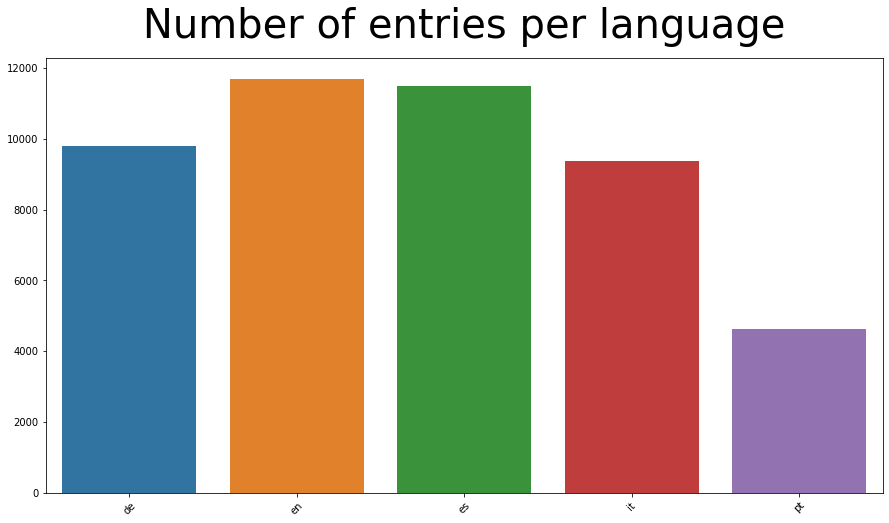

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45, fontsize=10)
g = sns.countplot(data=df, x='language', order = df['language'].value_counts().index.sort_values())
g.set_xlabel('', fontsize = 20)
g.set_ylabel('', fontsize = 20)
g.set_title('Number of entries per language', fontsize = 40, pad=20)

Text(0.5, 1.0, 'Number of entries per subreddit')

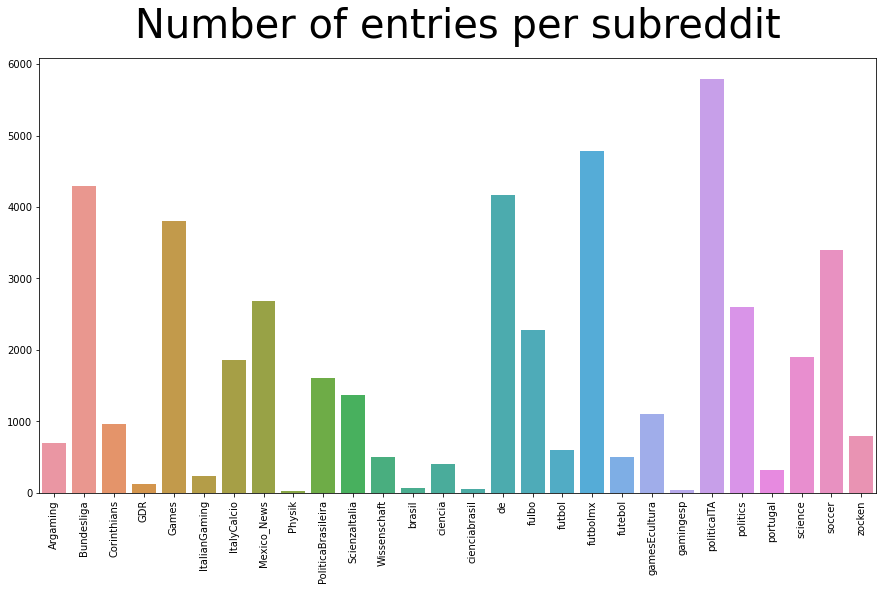

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=90, fontsize=10)
g = sns.countplot(data=df, x='subreddit', order = df['subreddit'].value_counts().index.sort_values())
g.set_xlabel('', fontsize = 20)
g.set_ylabel('', fontsize = 20)
g.set_title('Number of entries per subreddit', fontsize = 40, pad=20)

Text(0.5, 1.0, 'Number of entries per category')

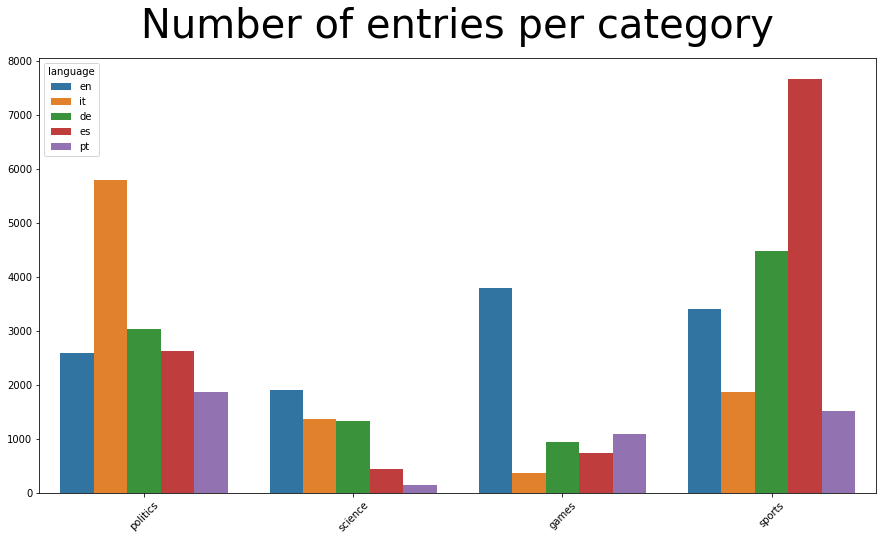

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45, fontsize=10)
g = sns.countplot(data=df, x='category', hue='language')
g.set_xlabel('', fontsize = 20)
g.set_ylabel('', fontsize = 20)
g.set_title('Number of entries per category', fontsize = 40, pad=20)

Let's make the dataset more balanced

In [ ]:
df_politics_it = df[(df['language'] == 'it') & (df['category'] == 'politics')].sample(n=2800)
df = pd.concat([df[~((df['language'] == 'it') & (df['category'] == 'politics'))], df_politics_it])

In [ ]:
df_games_en = df[(df['language'] == 'en') & (df['category'] == 'games')].sample(n=1200)
df = pd.concat([df[~((df['language'] == 'en') & (df['category'] == 'games'))], df_games_en])

In [ ]:
df_sports_es = df[(df['language'] == 'es') & (df['category'] == 'sports')].sample(n=3000)
df = pd.concat([df[~((df['language'] == 'es') & (df['category'] == 'sports'))], df_sports_es])

In [ ]:
df_sports_en = df[(df['language'] == 'en') & (df['category'] == 'sports')].sample(n=2500)
df = pd.concat([df[~((df['language'] == 'en') & (df['category'] == 'sports'))], df_sports_en])

In [ ]:
df_sports_de = df[(df['language'] == 'de') & (df['category'] == 'sports')].sample(n=2500)
df = pd.concat([df[~((df['language'] == 'de') & (df['category'] == 'sports'))], df_sports_de])

Text(0.5, 1.0, 'Number of entries per category')

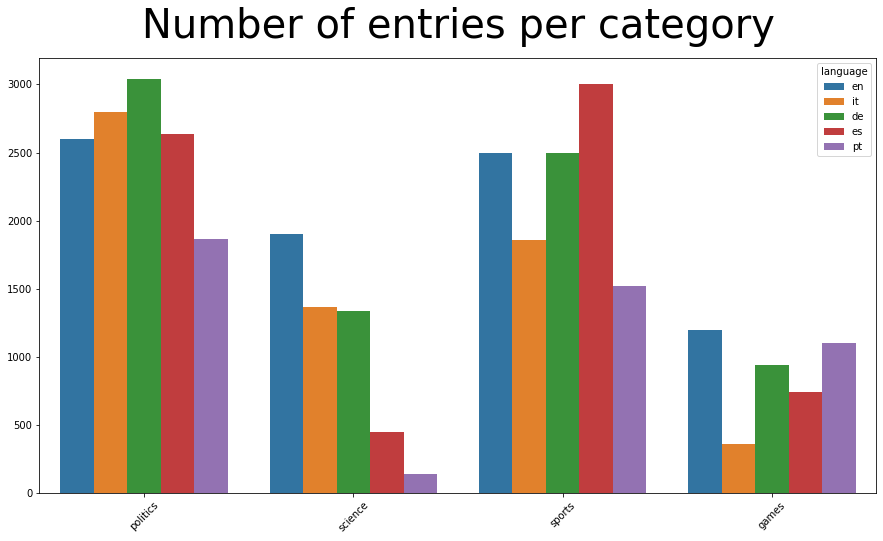

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45, fontsize=10)
g = sns.countplot(data=df, x='category', hue='language')
g.set_xlabel('', fontsize = 20)
g.set_ylabel('', fontsize = 20)
g.set_title('Number of entries per category', fontsize = 40, pad=20)

In [ ]:
df.to_csv('reddit_multilingual_clean.csv', index=False)
save_file_to_drive('reddit_multilingual_clean.csv', 'reddit_multilingual_clean.csv')

File ID: 1Py8tLtaV5cMPoy6Nw8GO8LBdjNKjXCSg


{'id': '1Py8tLtaV5cMPoy6Nw8GO8LBdjNKjXCSg'}

## Control data

In [ ]:
subreddit = 'france'
print("\nDownloading subreddit ", subreddit)
print("\n")
latest_submissions = []
latest_submissions = crawl_subreddit(subreddit, 'created_utc', max_submissions=100000)
df = pd.DataFrame(latest_submissions)
df.to_csv(subreddit + '.csv', index=False)




100 posts obtained out of 100000
200 posts obtained out of 100000
300 posts obtained out of 100000
400 posts obtained out of 100000
500 posts obtained out of 100000
600 posts obtained out of 100000
700 posts obtained out of 100000
800 posts obtained out of 100000
900 posts obtained out of 100000
1000 posts obtained out of 100000
1100 posts obtained out of 100000
1200 posts obtained out of 100000
1300 posts obtained out of 100000
1400 posts obtained out of 100000
1500 posts obtained out of 100000
1600 posts obtained out of 100000
1700 posts obtained out of 100000
1800 posts obtained out of 100000
1900 posts obtained out of 100000
2000 posts obtained out of 100000
2100 posts obtained out of 100000
2200 posts obtained out of 100000
2300 posts obtained out of 100000
2400 posts obtained out of 100000
2500 posts obtained out of 100000
2600 posts obtained out of 100000
2700 posts obtained out of 100000
2800 posts obtained out of 100000
2900 posts obtained out of 100000
3000 posts obtained 

In [ ]:
subreddit = 'jeuxvideo'
print("\nDownloading subreddit ", subreddit)
print("\n")
latest_submissions = []
latest_submissions = crawl_subreddit(subreddit, 'created_utc')
df = pd.DataFrame(latest_submissions)
df.to_csv(subreddit + '.csv', index=False)




100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtained out of 10000
600 posts obtained out of 10000
700 posts obtained out of 10000
800 posts obtained out of 10000
900 posts obtained out of 10000
1000 posts obtained out of 10000
1100 posts obtained out of 10000
1200 posts obtained out of 10000
1300 posts obtained out of 10000
1400 posts obtained out of 10000
1500 posts obtained out of 10000
1600 posts obtained out of 10000
1700 posts obtained out of 10000
1800 posts obtained out of 10000
1900 posts obtained out of 10000
2000 posts obtained out of 10000
2100 posts obtained out of 10000
2200 posts obtained out of 10000
2300 posts obtained out of 10000
2400 posts obtained out of 10000
2500 posts obtained out of 10000
2600 posts obtained out of 10000
2700 posts obtained out of 10000
2800 posts obtained out of 10000
2900 posts obtained out of 10000
3000 posts obtained out of 10000
3100 posts obtai

In [ ]:
subreddit = 'sciencefr'
print("\nDownloading subreddit ", subreddit)
print("\n")
latest_submissions = []
latest_submissions = crawl_subreddit(subreddit, 'created_utc')
df = pd.DataFrame(latest_submissions)
df.to_csv(subreddit + '.csv', index=False)




100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtained out of 10000
600 posts obtained out of 10000
700 posts obtained out of 10000
800 posts obtained out of 10000
900 posts obtained out of 10000
1000 posts obtained out of 10000
1100 posts obtained out of 10000
1200 posts obtained out of 10000
1300 posts obtained out of 10000
1400 posts obtained out of 10000
1500 posts obtained out of 10000
1600 posts obtained out of 10000
1700 posts obtained out of 10000
1800 posts obtained out of 10000
1900 posts obtained out of 10000
2000 posts obtained out of 10000
2100 posts obtained out of 10000
2200 posts obtained out of 10000
2300 posts obtained out of 10000
2400 posts obtained out of 10000
2500 posts obtained out of 10000
2600 posts obtained out of 10000
2700 posts obtained out of 10000
2800 posts obtained out of 10000
2900 posts obtained out of 10000
3000 posts obtained out of 10000
3100 posts obtai

In [ ]:
subreddit = 'ligue1'
print("\nDownloading subreddit ", subreddit)
print("\n")
latest_submissions = []
latest_submissions = crawl_subreddit(subreddit, 'created_utc')
df = pd.DataFrame(latest_submissions)
df.to_csv(subreddit + '.csv', index=False)




100 posts obtained out of 10000
200 posts obtained out of 10000
300 posts obtained out of 10000
400 posts obtained out of 10000
500 posts obtained out of 10000
600 posts obtained out of 10000
700 posts obtained out of 10000
800 posts obtained out of 10000
900 posts obtained out of 10000
1000 posts obtained out of 10000
1100 posts obtained out of 10000
1200 posts obtained out of 10000
1300 posts obtained out of 10000
1400 posts obtained out of 10000
1500 posts obtained out of 10000
1600 posts obtained out of 10000
1700 posts obtained out of 10000
1800 posts obtained out of 10000
1900 posts obtained out of 10000
2000 posts obtained out of 10000
2100 posts obtained out of 10000
2200 posts obtained out of 10000
2300 posts obtained out of 10000
2400 posts obtained out of 10000
2500 posts obtained out of 10000
2600 posts obtained out of 10000
2700 posts obtained out of 10000
2800 posts obtained out of 10000
2900 posts obtained out of 10000
3000 posts obtained out of 10000
3100 posts obtai

In [ ]:
save_file_to_drive('france.csv', 'france.csv')
save_file_to_drive('jeuxvideo.csv', 'jeuxvideo.csv')
save_file_to_drive('sciencefr.csv', 'sciencefr.csv')
save_file_to_drive('ligue1.csv', 'ligue1.csv')


File ID: 1A7Le4ygjPYVhrRtM9Sb3BeqaN54SsX0P
File ID: 1ijNMiqkco6uG0uKgRf2JUxi4DuS2NNa0
File ID: 1vQm4XozPAS5iCztwIpwbcGZ8a-eQJ-P_
File ID: 1MxPPXNkZhH_GGx-HNw8HC3K6CXLPqhxD


{'id': '1MxPPXNkZhH_GGx-HNw8HC3K6CXLPqhxD'}

We cleaned them a little bit

In [ ]:
#france subreddit -> we need to select politics comment
df = pd.read_csv('france.csv')
df_politics = df[df['link_flair_text'] == 'Politique']
df_politics = df_politics.drop(df_politics.columns.difference(['title']), axis=1)
df_politics['category'] = 'Politics'

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,10,56,59,62,76,79,82,83,84,86,87,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#sciencefr -> category science
df_science = pd.read_csv('sciencefr.csv')
df_science = df_science.drop(df_science.columns.difference(['title']), axis=1)
df_science['category'] = 'Science'

In [ ]:
#ligue1 -> category sports
df_sports = pd.read_csv('ligue1.csv')
df_sports = df_sports.drop(df_sports.columns.difference(['title']), axis=1)
df_sports['category'] = 'Sports'

In [ ]:
#jeuxvideo -> category videogame
df_games = pd.read_csv('jeuxvideo.csv')
df_games = df_games.drop(df_games.columns.difference(['title']), axis=1)
df_games['category'] = 'Games'

In [ ]:
df = pd.concat([df_politics,df_sports, df_science, df_games])

In [ ]:
len(df)

25087

In [ ]:
df.groupby(by='category').count()

,title
category,
Games,5274
Politics,3146
Science,10000
Sports,6667


In [ ]:
df.to_csv('multilingual_control.csv', index=False)
save_file_to_drive('multilingual_control.csv', 'multilingual_control.csv')

File ID: 1VWPVy7fNio7hnLWPXzLyRvv4fXxdPLYc


{'id': '1VWPVy7fNio7hnLWPXzLyRvv4fXxdPLYc'}